In [1]:
from store_risk_factors import initialize_risk_df
from pathlib import Path
current_path = Path.cwd()
df = initialize_risk_df(current_path)
print(df)

        cik         company ticker filing_date  \
0   1045810     NVIDIA CORP   NVDA  2020-02-20   
1   1045810     NVIDIA CORP   NVDA  2021-02-26   
2   1045810     NVIDIA CORP   NVDA  2022-03-18   
3   1045810     NVIDIA CORP   NVDA  2023-02-24   
4   1045810     NVIDIA CORP   NVDA  2024-02-21   
5    320193      Apple Inc.   AAPL  2020-10-30   
6    320193      Apple Inc.   AAPL  2021-10-29   
7    320193      Apple Inc.   AAPL  2022-10-28   
8    320193      Apple Inc.   AAPL  2023-11-03   
9    320193      Apple Inc.   AAPL  2024-11-01   
10   789019  MICROSOFT CORP   MSFT  2020-07-30   
11   789019  MICROSOFT CORP   MSFT  2021-07-29   
12   789019  MICROSOFT CORP   MSFT  2022-07-28   
13   789019  MICROSOFT CORP   MSFT  2023-07-27   
14   789019  MICROSOFT CORP   MSFT  2024-07-30   

                                              item_1A  
0   ITEM 1A. RISK FACTORS\nIn evaluating NVIDIA an...  
1   ITEM 1A. RISK FACTORS\nIn evaluating NVIDIA an...  
2   ITEM 1A. RISK FACTORS\nIn e

In [2]:
from bert_score import sentiment_scores
df = sentiment_scores(df)
print(df)

c:\SEC-10-K\SEC-10-K-Filings-Downloader\sec_proj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (8408 > 512). Running this sequence through the model will result in indexing errors


        cik         company ticker filing_date  \
0   1045810     NVIDIA CORP   NVDA  2020-02-20   
1   1045810     NVIDIA CORP   NVDA  2021-02-26   
2   1045810     NVIDIA CORP   NVDA  2022-03-18   
3   1045810     NVIDIA CORP   NVDA  2023-02-24   
4   1045810     NVIDIA CORP   NVDA  2024-02-21   
5    320193      Apple Inc.   AAPL  2020-10-30   
6    320193      Apple Inc.   AAPL  2021-10-29   
7    320193      Apple Inc.   AAPL  2022-10-28   
8    320193      Apple Inc.   AAPL  2023-11-03   
9    320193      Apple Inc.   AAPL  2024-11-01   
10   789019  MICROSOFT CORP   MSFT  2020-07-30   
11   789019  MICROSOFT CORP   MSFT  2021-07-29   
12   789019  MICROSOFT CORP   MSFT  2022-07-28   
13   789019  MICROSOFT CORP   MSFT  2023-07-27   
14   789019  MICROSOFT CORP   MSFT  2024-07-30   

                                              item_1A sentiment_label  \
0   ITEM 1A. RISK FACTORS\nIn evaluating NVIDIA an...        negative   
1   ITEM 1A. RISK FACTORS\nIn evaluating NVIDIA an...

In [3]:
from market_data import add_financial_market_data
df = add_financial_market_data(df)
print(df)

        cik         company ticker filing_date  \
0   1045810     NVIDIA CORP   NVDA  2020-02-20   
1   1045810     NVIDIA CORP   NVDA  2021-02-26   
2   1045810     NVIDIA CORP   NVDA  2022-03-18   
3   1045810     NVIDIA CORP   NVDA  2023-02-24   
4   1045810     NVIDIA CORP   NVDA  2024-02-21   
5    320193      Apple Inc.   AAPL  2020-10-30   
6    320193      Apple Inc.   AAPL  2021-10-29   
7    320193      Apple Inc.   AAPL  2022-10-28   
8    320193      Apple Inc.   AAPL  2023-11-03   
9    320193      Apple Inc.   AAPL  2024-11-01   
10   789019  MICROSOFT CORP   MSFT  2020-07-30   
11   789019  MICROSOFT CORP   MSFT  2021-07-29   
12   789019  MICROSOFT CORP   MSFT  2022-07-28   
13   789019  MICROSOFT CORP   MSFT  2023-07-27   
14   789019  MICROSOFT CORP   MSFT  2024-07-30   

                                              item_1A sentiment_label  \
0   ITEM 1A. RISK FACTORS\nIn evaluating NVIDIA an...        negative   
1   ITEM 1A. RISK FACTORS\nIn evaluating NVIDIA an...

In [4]:
correlation = df['continuous_sentiment'].corr(df['next_close'])
print(correlation)

0.8140058254929009


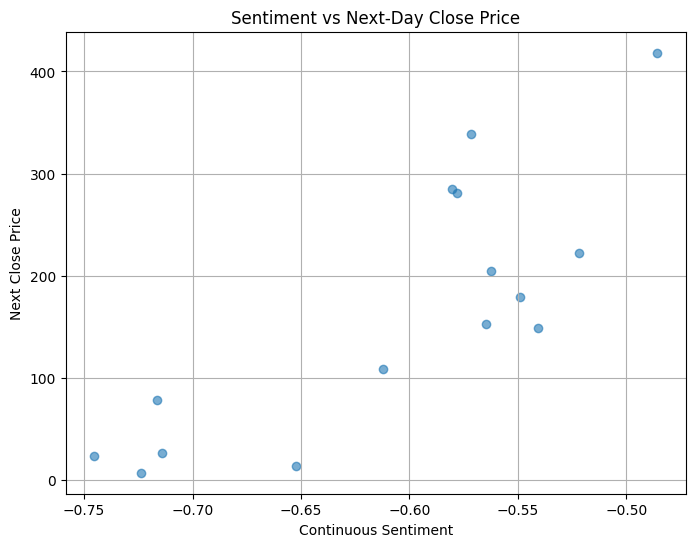

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(
    df['continuous_sentiment'],
    df['next_close'],
    alpha=0.6
)
plt.xlabel('Continuous Sentiment')
plt.ylabel('Next Close Price')
plt.title('Sentiment vs Next-Day Close Price')
plt.grid(True)
plt.show()

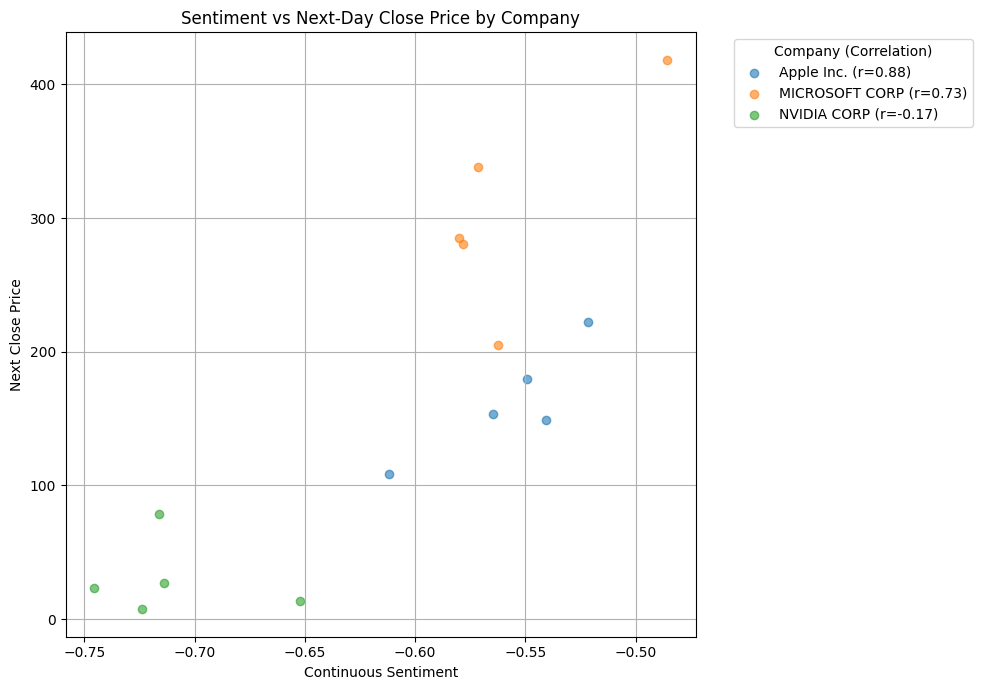

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plot_df = df[['continuous_sentiment', 'next_close', 'company']].dropna()
for company, group in plot_df.groupby('company'):
    if len(group) >= 2:
        corr = group['continuous_sentiment'].corr(group['next_close'])
        label = f"{company} (r={corr:.2f})"
    else:
        label = f"{company} (r=NA)"
    plt.scatter(
        group['continuous_sentiment'],
        group['next_close'],
        alpha=0.6,
        label=label
    )

plt.xlabel('Continuous Sentiment')
plt.ylabel('Next Close Price')
plt.title('Sentiment vs Next-Day Close Price by Company')
plt.grid(True)
plt.legend(title='Company (Correlation)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()